# Analysis for PV Panels in North of Norway (latitud: 70)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Energy consumption
"In Norway, average household electricity consumption is 16 000 kWh per year, and the average price was NOK 1.1 per kWh in 2013." <br>
[Source: energifaktanorge.no](https://energifaktanorge.no/en/norsk-energibruk/energibruken-i-ulike-sektorer/)

The average household electricity consumption in Northern Norway was 19719 in 2012 (last data available). <br>
[Source: ssb.no](https://www.ssb.no/en/statbank/list/husenergi)

In [2]:
cons = pd.read_csv("energy_consumption_region.csv", delimiter= ';')
cons.tail()

,region,energy commodity,2009,2012
35,Northern Norway,Total,20919,23056
36,Northern Norway,Electrisity,17462,19719
37,Northern Norway,Oil and kerosene,283,451
38,Northern Norway,"Wood, pellets and wood briuettes",3141,2814
39,Northern Norway,Gas and district heating,33,73


# PV Cost

## Subsidies

### ENOVA

https://www.enova.no/privat/alle-energitiltak/solenergi/el-produksjon-/

From 1 July 2020, the fixed subsidy rate for electricity generation will change from NOK 10,000 to NOK 7,500. The rate of NOK 1,250 per installed power up to 15 kW is maintained.

To receive the current support rate, the measure must be completed and registered with an invoice in Enova's application portal by 30 June 2020.

Due to the corona situation, Enova has chosen to postpone these changes from April 1 to July 1.


Norway's subsidies at 1000€ + 125€/kW (usually amount to +/- 15% of system cost)
Source: https://www.otovo.no/blog/2019/02/21/the-otovo-solar-insight-solar-payback-trends-2019/


* Type of scheme: Feed-in-tariff (Plusskundeordningen)
* Value: 30 øre/kWh electricity sold to the grid (0.03-0.04 €/kWh)
* Start/end: 2015 - current 
* Eligibility: <100kW capacity Other information: NOK 15 000 registration fee for prosumers (<100 kW). These schemes differ depending on the energy provider

* Type of scheme: Subsidy (Enova) 
* Value:  Support is limited to 10,000 NOK plus 1,250 NOK/kWp, up to a maximal capacity of 15 kWp. This is equivalent to 10-30% of the system cost.  
* Start/end: 2015- current

Source: https://ec.europa.eu/commission/sites/beta-political/files/study-residential-prosumers-energy-union_en.pdf

## System elements and prices

In [3]:
#Solar panels
category = ['Entry', 'Entry', 'Entry', 'Entry', 'Entry', 'Max_Power', 'Max_Power', 
            'Max_Power', 'Max_Power', 'Grid', 'Grid']
item = ['1', '2', '3', '4', '5','1', '2', '3', '4', '1', '2']

hier_index = list(zip(category, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'item'])

data = np.array([[80, 4.6, 105.5, 54.5, 3.5, 1290],
                 [90, 5.4, 100.5, 52, 3.5, 1290],
                 [140, 8.88, 147, 66, 5, 2290],
                 [160, 9.6, 130.6, 66.6, 3.5, 2290],
                 [200, 11.3, 158, 80.8, 3.5, 3499],
                 [50, 3, 63, 54, 3.5, 1090],
                 [75, 4.17, 110.8, 50.2, 3.5, 2790],
                 [100, 6, 119.5, 54, 4, 1999],
                 [185, 11.1, 148.2, 66.6, 4, 2999],
                 [300, 10.8, 165, 99.2, 3.5, 2999],
                 [315, 9.31, 165, 99.2, 3, 3290]])

df_panel = pd.DataFrame(data, index=hier_index, columns= ['watts','A', 'X', 'Y', 'Z', 'Price'])

In [4]:
#Panels structure
category = ['Bracket', 'Bracket', 'Bracket', 'Bracket', 'Tray rack', 'Tray rack', 'Tray rack']
item = ['1','2','3','4','1','2','3']

hier_index = list(zip(category, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'item'])

data = np.array([['50/75/80/90/100', 1, 'adjus', 775],
                 ['140/160/185', 1, 'adjus', 775],
                 ['270/280/300', 1, 'adjus', 1049],
                 ['185', 4, 'not-adjus', 12900],
                 ['300', 4, 'adjus', 15990],
                 ['300', 6, 'adjus', 18490],
                 ['90/160/200/50/75/100/185', 1, 'adjus',1195]])

df_struc = pd.DataFrame(data, index=hier_index, columns= ['panels','Quant', 'Movement', 'Price'])

In [5]:
#Charge regulator
brand = ['Basic', 'Basic', 'MorningStar', 'SunWind', 'SunWind','PeakPower', 'PeakPower', 'PeakPower', 
            'Victron', 'Victron', 'Victron SmartSolar', 'Victron SmartSolar', 'Victron BlueSolar']
item = ['1', '2', '1', '1', '2', '1', '2', '3', '1', '2', '1', '2', '1']

hier_index = list(zip(brand, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['brand', 'item'])

data = np.array([[10, 'NA', 'NA', 'NA', 495],
                 [20, 'NA', 'NA', 'NA', 595],
                 [30, 'NA', 'NA', 'NA', 3490],
                 [16, 180, 180, 'NA', 1890],
                 [20, 240, 240, 'NA', 2990],
                 [10, 130,260, 'NA', 1290],
                 [20, 260,520, 'NA', 1790],
                 [30, 390, 780, 'NA', 1995],
                 [30, 'NA', 'NA', 100, 2990],
                 [50, 'NA', 'NA', 100, 3990],
                 [70, 1000, 2000, 'NA', 7990],
                 [15, 220, 440, 75, 1499],
                 [10, 'NA', 'NA', 'NA', 890]])

df_reg = pd.DataFrame(data, index=hier_index, columns= ['A', 'max_12V', 'max_24', 'V', 'Price'])

In [6]:
#Batteries
category = ['SunWind', 'SunWind', 'SunWind', 'SunWind', 'SunWind', 'SunWind', 'SunWind', 'SunWind',
           'Rolls', 'Rolls', 'Rolls', 'Rolls', 'Rolls', 'Rolls', 'MG', 'MG']
technology = ['AGM', 'AGM', 'AGM', 'AGM', 'Lithium', 'Lithium', 'Lithium', 'Lithium',
             'Lead / acid', 'Lead / acid', 'Lead / acid', 'Lead / acid', 'Lead / acid',
             'Lead / acid', 'Lithium', 'Lithium', ]
item = ['1', '2', '3', '4', '5', '6', '7', '8', '1', 
            '2', '3', '4', '5', '6', '1', '2']

hier_index = list(zip(category, technology, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'tech', 'item'])

data = np.array([[136, 'NA', 32.9,17.3, 20.9, 32.5, 3390],
                [260, 'NA', 52.2, 24, 22, 64, 5990],
                [292, 'NA', 52.1, 27, 20.3, 73.5, 6990],
                [305, 'NA', 52.6, 27.8, 26, 72.1, 11995],
                [50, 'NA', 25, 16, 18, 7.5, 4499],
                [100,'NA', 31, 17.3, 21.7, 13.5, 6999],
                [125, 'NA', 33.7, 17.2, 27.9, 15, 12995],
                [300, 'NA', 52, 26.8, 22.8, 35.3, 25195],
                [120, 12, 34.3, 17.1, 24.1, 34, 3490],
                [504, 6, 31.8, 18.1, 42.5, 60, 6995],
                [503, 12, 55.7, 28.6, 46.4, 123, 17990],
                [605, 6, 31.8, 18.1, 42.5, 57, 6790],
                [2490, 2, 39.2, 22.4, 63, 94, 12595],
                [3426, 2, 39.4, 22.9, 80.3, 129, 15990],
                [200, 'NA', 'NA', 'NA', 'NA', 'NA', 49990],
                [300, 'NA', 'NA', 'NA', 'NA', 'NA', 62990]])

df_bat = pd.DataFrame(data, index=hier_index, columns= ['cap', 'V', 'X', 'Y', 'Z','weight', 'Price'])

In [7]:
#Inverter
category = ['SunWind', 'SunWind', 'SunWind', 'Phoenix', 'Phoenix', 'Phoenix', 'Phoenix',
            'Phoenix', 'Phoenix', 'Phoenix', 'Phoenix', 'Phoenix', 'Phoenix' ]
item = ['1', '2', '3', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

hier_index = list(zip(category, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'item'])

data = np.array([[12, 300, 'No', 1390],
                [12, 600, 'No', 1990],
                [12, 1500, 'No', 3695],
                [12, 250, 'No', 1390],
                [12, 375, 'No', 1790],
                [12, 500, 'Yes', 2195],
                [12, 800, 'No', 3495],
                [12, 1200, 'Yes', 4999],
                [24, 250, 'Yes', 1390],
                [24, 375, 'Yes', 1790],
                [24, 500, 'Yes', 2195],
                [24, 800, 'Yes', 3495],
                [24, 1200, 'Yes', 4999]])

df_inv = pd.DataFrame(data, index=hier_index, columns= ['voltage', 'power', 'connect', 'Price'])

In [8]:
#Exchangers
category = ['Multiplus', 'Multiplus', 'Multiplus', 'Quattro', 'Quattro', 'Quattro', 
            'EasySolar', 'EasySolar', 'Multi']
item = ['1', '2', '3', '1', '2', '3', '1', '2', '1']

hier_index = list(zip(category, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'item'])

data = np.array([[12, 1200, 2100, 300, 11490],
                 [12, 2000, 4000, 500, 14995],
                 [12, 3000, 6000, 800, 20495],
                 [24, 5000, 5000, 800, 32995],
                 [12, 3000, 6000, 800, 25995],
                 [48, 8000, 8000, 600, 34990],
                 [24, 3000, 3000, 200, 16999],
                 [24, 3000, 6000, 400, 24999],
                 [12, 500, 900, 250, 5990]])

df_exc = pd.DataFrame(data, index=hier_index, columns= ['voltage', 'VA', 'power', 'battery', 'Price'])

In [9]:
#Accesories
category = ['Structure', 'Structure', 'Structure', 'Structure', 'Structure', 'Security',
           'Cable', 'Cable', 'Cable', 'Cable', 'Cable', 'Cable', 'Aditional']
item = ['1', '2', '3', '4', '5', '1', '1', '2', '3', '4', '5', '6', '1']

hier_index = list(zip(category, item))
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['cat', 'item'])

data = np.array([['Aluminium rail', 360],
                ['Shot for alloy rail', 99],
                ['Mounting clip double', 45],
                ['Mounting clip simple', 40],
                ['Mounting bracket', 87],
                ['Switch, 2 poles, 25A', 695],
                ['Cable(4mm2, 50m)', 1690],
                ['Cable clips(100)', 139],
                ['Cable MC4 for solar panel (1m)', 69],
                ['Splitter MC4 cable', 164],
                ['Battery-regulator cable', 225],
                ['Battery parallelcable (6mm, 1m)', 115],
                ['Battery monitor', 2595]])

df_acc = pd.DataFrame(data, index=hier_index, columns= ['description', 'Price'])

In [10]:
print('panels')
display(df_panel)
print('structure')
display(df_struc)
print('regulator')
display(df_reg)
print('exchanger')
display(df_exc)
print('inverter')
display(df_inv)
print('batteries')
display(df_bat)
print('accesories')
display(df_acc)

panels


watts      A      X     Y    Z   Price
cat       item                                        
Entry     1      80.0   4.60  105.5  54.5  3.5  1290.0
          2      90.0   5.40  100.5  52.0  3.5  1290.0
          3     140.0   8.88  147.0  66.0  5.0  2290.0
          4     160.0   9.60  130.6  66.6  3.5  2290.0
          5     200.0  11.30  158.0  80.8  3.5  3499.0
Max_Power 1      50.0   3.00   63.0  54.0  3.5  1090.0
          2      75.0   4.17  110.8  50.2  3.5  2790.0
          3     100.0   6.00  119.5  54.0  4.0  1999.0
          4     185.0  11.10  148.2  66.6  4.0  2999.0
Grid      1     300.0  10.80  165.0  99.2  3.5  2999.0
          2     315.0   9.31  165.0  99.2  3.0  3290.0

structure


panels Quant   Movement  Price
cat       item                                                  
Bracket   1              50/75/80/90/100     1      adjus    775
          2                  140/160/185     1      adjus    775
          3                  270/280/300     1      adjus   1049
          4                          185     4  not-adjus  12900
Tray rack 1                          300     4      adjus  15990
          2                          300     6      adjus  18490
          3     90/160/200/50/75/100/185     1      adjus   1195

regulator


A max_12V max_24    V Price
brand              item                              
Basic              1     10      NA     NA   NA   495
                   2     20      NA     NA   NA   595
MorningStar        1     30      NA     NA   NA  3490
SunWind            1     16     180    180   NA  1890
                   2     20     240    240   NA  2990
PeakPower          1     10     130    260   NA  1290
                   2     20     260    520   NA  1790
                   3     30     390    780   NA  1995
Victron            1     30      NA     NA  100  2990
                   2     50      NA     NA  100  3990
Victron SmartSolar 1     70    1000   2000   NA  7990
                   2     15     220    440   75  1499
Victron BlueSolar  1     10      NA     NA   NA   890

exchanger


voltage    VA  power  battery  Price
cat       item                                      
Multiplus 1          12  1200   2100      300  11490
          2          12  2000   4000      500  14995
          3          12  3000   6000      800  20495
Quattro   1          24  5000   5000      800  32995
          2          12  3000   6000      800  25995
          3          48  8000   8000      600  34990
EasySolar 1          24  3000   3000      200  16999
          2          24  3000   6000      400  24999
Multi     1          12   500    900      250   5990

inverter


voltage power connect Price
cat     item                            
SunWind 1         12   300      No  1390
        2         12   600      No  1990
        3         12  1500      No  3695
Phoenix 1         12   250      No  1390
        2         12   375      No  1790
        3         12   500     Yes  2195
        4         12   800      No  3495
        5         12  1200     Yes  4999
        6         24   250     Yes  1390
        7         24   375     Yes  1790
        8         24   500     Yes  2195
        9         24   800     Yes  3495
        10        24  1200     Yes  4999

batteries


cap   V     X     Y     Z weight  Price
cat     tech        item                                          
SunWind AGM         1      136  NA  32.9  17.3  20.9   32.5   3390
                    2      260  NA  52.2    24    22     64   5990
                    3      292  NA  52.1    27  20.3   73.5   6990
                    4      305  NA  52.6  27.8    26   72.1  11995
        Lithium     5       50  NA    25    16    18    7.5   4499
                    6      100  NA    31  17.3  21.7   13.5   6999
                    7      125  NA  33.7  17.2  27.9     15  12995
                    8      300  NA    52  26.8  22.8   35.3  25195
Rolls   Lead / acid 1      120  12  34.3  17.1  24.1     34   3490
                    2      504   6  31.8  18.1  42.5     60   6995
                    3      503  12  55.7  28.6  46.4    123  17990
                    4      605   6  31.8  18.1  42.5     57   6790
                    5     2490   2  39.2  22.4    63     94  12595
                    6     3426   2  39.4  22.9  80.3    129  15990
MG      Lithium     1      200  NA    NA    NA    NA     NA  49990
                    2      300  NA    NA    NA    NA     NA  62990

accesories


description Price
cat       item                                       
Structure 1                      Aluminium rail   360
          2                 Shot for alloy rail    99
          3                Mounting clip double    45
          4                Mounting clip simple    40
          5                    Mounting bracket    87
Security  1                Switch, 2 poles, 25A   695
Cable     1                    Cable(4mm2, 50m)  1690
          2                    Cable clips(100)   139
          3      Cable MC4 for solar panel (1m)    69
          4                  Splitter MC4 cable   164
          5             Battery-regulator cable   225
          6     Battery parallelcable (6mm, 1m)   115
Aditional 1                     Battery monitor  2595

## Analysis and design
### Solar panels

In [11]:
df_panel['NOK/W'] = round((df_panel['Price'] / df_panel['watts']),2)
df_panel.sort_values(by='NOK/W', ascending=True)

watts      A      X     Y    Z   Price  NOK/W
cat       item                                               
Grid      1     300.0  10.80  165.0  99.2  3.5  2999.0  10.00
          2     315.0   9.31  165.0  99.2  3.0  3290.0  10.44
Entry     4     160.0   9.60  130.6  66.6  3.5  2290.0  14.31
          2      90.0   5.40  100.5  52.0  3.5  1290.0  14.33
          1      80.0   4.60  105.5  54.5  3.5  1290.0  16.12
Max_Power 4     185.0  11.10  148.2  66.6  4.0  2999.0  16.21
Entry     3     140.0   8.88  147.0  66.0  5.0  2290.0  16.36
          5     200.0  11.30  158.0  80.8  3.5  3499.0  17.50
Max_Power 3     100.0   6.00  119.5  54.0  4.0  1999.0  19.99
          1      50.0   3.00   63.0  54.0  3.5  1090.0  21.80
          2      75.0   4.17  110.8  50.2  3.5  2790.0  37.20

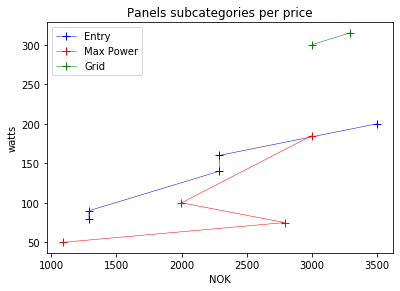

In [12]:
# Create Figure (empty canvas)
fig1 = plt.figure()

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

#AGM
eprice = df_panel.loc['Entry'][['Price']]
ewatt = df_panel.loc['Entry'][['watts']]
#Lithium
mpprice = df_panel.loc['Max_Power'][['Price']]
mpwatt = df_panel.loc['Max_Power'][['watts']]
#Lead acid
gprice = df_panel.loc['Grid'][['Price']]
gwatt = df_panel.loc['Grid'][['watts']]

# Plot on that set of axes
axes.plot(eprice, ewatt,'b', lw=0.5, ls='-', marker='+', ms = 8, label="Entry")
axes.plot(mpprice, mpwatt, 'r', lw=0.5, ls='-', marker='+', ms = 8, label="Max Power")
axes.plot(gprice, gwatt, 'g', lw=0.5, ls='-', marker='+', ms = 8, label="Grid")

axes.set_xlabel('NOK')
axes.set_ylabel('watts')
axes.set_title('Panels subcategories per price')
axes.legend(loc=0)

The best relation between power and price is given by the "Grid" panels, being the the panel of 300 watts the cheapest price in NOK/watt. <br>

### Energy produced
The system proposed is of 3kWp installed, to try to match the energy consumption of a household.

In [13]:
pwsyst = 3000 #3000 wp = 3 kWp
pwpanel = df_panel.loc['Grid'].loc['1'][['watts']] #panel selected (Grid, 300w)
quantity = pwsyst / pwpanel #10

## Climatic conditions

NASA/POWER Climatologies <br>
Monthly & Annual Climatologies (July 1983 - June 2005)<br>
Location: Latitude  70.43   Longitude 24.5 <br>
Source: https://power.larc.nasa.gov/data-access-viewer/

In [15]:
df_clim = pd.read_csv('Climatology.csv', delimiter= ';', na_values= 'NA')
df_clim

,PARAMETER,Unit,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,Temperature at 2 Meters,C,-8.93,-9.25,-6.43,-2.97,1.62,7.55,10.79,9.30,4.93,-0.49,-5.68,-7.70,-0.61
1,Daylight Hours,hours,0.00,7.33,11.65,16.22,24.02,24.02,24.02,18.30,13.50,9.08,3.82,0.00,12.66
2,All Sky Insolation Incident on a Horizontal Su...,kW-hr/m^2/day,0.00,0.24,1.14,2.76,4.15,5.19,4.58,3.33,1.81,0.53,0.03,0.00,1.98
3,Insolation Clearness Index,dimensionless,0.03,0.30,0.40,0.44,0.42,0.43,0.42,0.43,0.41,0.33,0.12,0.00,0.31
4,Direct Normal Radiation,kW-hr/m^2/day,0.00,0.61,1.50,2.98,5.01,5.35,4.90,4.06,2.74,1.18,0.00,0.00,2.36
5,Diffuse Radiation On A Horizontal Surface,kW-hr/m^2/day,0.00,0.18,0.82,1.79,2.40,3.20,2.90,1.90,1.09,0.38,0.00,0.00,1.22
6,Solar Irradiance Tilted Surfaces (0 degrees),kW-hr/m^2/day,0.00,0.23,1.13,2.77,4.14,5.02,4.44,3.35,1.79,0.53,0.00,0.00,1.95
7,Solar Irradiance Tilted Surfaces (55 degrees),kW-hr/m^2/day,0.00,0.67,1.76,3.42,4.36,4.86,4.30,3.77,2.71,1.23,0.00,0.00,2.26
8,Solar Irradiance Tilted Surfaces (70 degrees),kW-hr/m^2/day,0.00,0.71,1.77,3.30,4.06,4.38,3.85,3.48,2.66,1.28,0.00,0.00,2.12
9,Solar Irradiance Tilted Surfaces (85 degrees),kW-hr/m^2/day,0.00,0.71,1.70,3.06,3.66,3.78,3.28,3.06,2.47,1.27,0.00,0.00,1.92


Text(0.5, 1.0, 'Monthly average temperature at 2 meters')

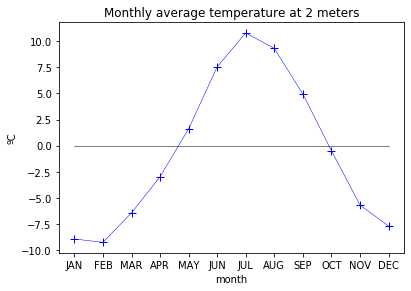

In [16]:
# Create Figure (empty canvas)
fig2 = plt.figure()

axes = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

#Temperature
months = df_clim.columns[2:14]
values = df_clim.iloc[0][2:14].astype(float)

# Plot on that set of axes
axes.plot(months, values,'b', lw=0.5, ls='-', marker='+', ms = 8)
axes.plot(months, np.zeros(12),'black', lw=0.5, ls='-')


axes.set_xlabel('month')
axes.set_ylabel('ºC')
axes.set_title('Monthly average temperature at 2 meters')

Text(0.5, 1.0, 'Daily hours')

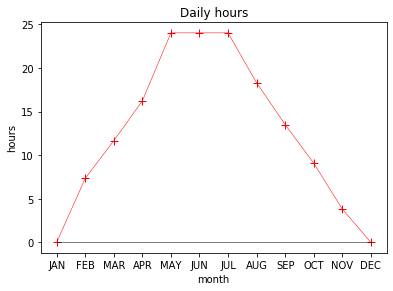

In [17]:
# Create Figure (empty canvas)
fig3 = plt.figure()

axes = fig3.add_axes([0.1, 0.1, 0.8, 0.8])

#hours
months = df_clim.columns[2:14]
values = df_clim.iloc[1][2:14].astype(float)

# Plot on that set of axes
axes.plot(months, values,'r', lw=0.5, ls='-', marker='+', ms = 8)
axes.plot(months, np.zeros(12),'black', lw=0.5, ls='-')


axes.set_xlabel('month')
axes.set_ylabel('hours')
axes.set_title('Daily hours')

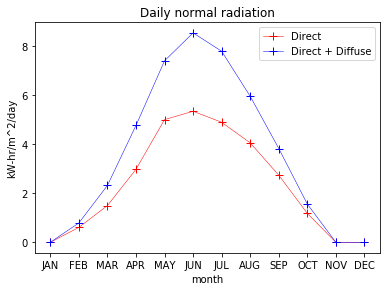

In [18]:
# Create Figure (empty canvas)
fig4 = plt.figure()

axes = fig4.add_axes([0.1, 0.1, 0.8, 0.8])

#Irradiation
months = df_clim.columns[2:14]
direct = df_clim.iloc[4][2:14].astype(float)
diff = df_clim.iloc[5][2:14].astype(float)

# Plot on that set of axes
axes.plot(months, direct,'r', lw=0.5, ls='-', marker='+', ms = 8, label="Direct")
axes.plot(months, (direct + diff),'b', lw=0.5, ls='-', marker='+', ms = 8, label="Direct + Diffuse")

axes.set_xlabel('month')
axes.set_ylabel('kW-hr/m^2/day')
axes.set_title('Daily normal radiation')
axes.legend(loc=0)

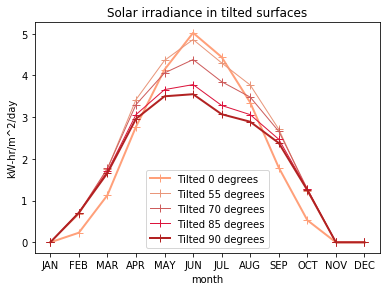

In [19]:
# Create Figure (empty canvas)
fig5 = plt.figure()

axes = fig5.add_axes([0.1, 0.1, 0.8, 0.8])

#Irradiation
months = df_clim.columns[2:14]
deg0 = df_clim.iloc[6][2:14].astype(float)
deg55 = df_clim.iloc[7][2:14].astype(float)
deg70 = df_clim.iloc[8][2:14].astype(float)
deg85 = df_clim.iloc[9][2:14].astype(float)
deg90 = df_clim.iloc[10][2:14].astype(float)

# Plot on that set of axes
axes.plot(months, deg0,'LightSalmon', lw=2, ls='-', marker='+', ms = 8, label="Tilted 0 degrees")
axes.plot(months, deg55,'DarkSalmon', lw=1, ls='-', marker='+', ms = 8, label="Tilted 55 degrees")
axes.plot(months, deg70,'IndianRed', lw=1, ls='-', marker='+', ms = 8, label="Tilted 70 degrees")
axes.plot(months, deg85,'Crimson', lw=1, ls='-', marker='+', ms = 8, label="Tilted 85 degrees")
axes.plot(months, deg90,'FIreBrick', lw=2, ls='-', marker='+', ms = 8, label="Tilted 90 degrees")

axes.set_xlabel('month')
axes.set_ylabel('kW-hr/m^2/day')
axes.set_title('Solar irradiance in tilted surfaces')
axes.legend(loc=0)

Text(0.5, 1.0, 'Solar irradiance optimal angle')

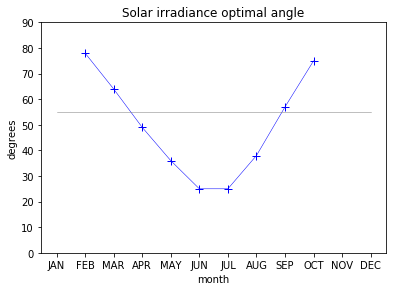

In [20]:
# Create Figure (empty canvas)
fig6 = plt.figure()

axes = fig6.add_axes([0.1, 0.1, 0.8, 0.8])

#Irradiation
months = df_clim.columns[2:14]
opt = df_clim.iloc[12][2:14].astype(float)
avg_opt = (55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, )

# Plot on that set of axes
axes.plot(months, opt,'b', lw=0.5, ls='-', marker='+', ms = 8)
axes.plot(months, avg_opt,'grey', lw=0.5, ls='-', )


axes.set_ylim([0, 90])

axes.set_xlabel('month')
axes.set_ylabel('degrees')
axes.set_title('Solar irradiance optimal angle')

## Electricity Cost

